#  Visualizar self-attention en acción con bertviz
1. Instalación dependencias 
    ```
    pip install bertviz transformers torch
    ```


In [4]:
!pip install bertviz transformers torch seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for pandas>=1.2 from https://files.pythonhosted.org/packages/29/d4/1244ab8edf173a10fd601f7e13b9566c1b525c4f365d6bee918e68381889/pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/81/c4/34e93fe5f5429d7570ec1fa436f1986fb1f00c3e0f43a589fe2bbcd22c3f/pytz-2025.2-py2.py3-none-any.whl.metadata
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/5c/23/c7abc0ca0a1526a0774eca151daeb8de62ec457e77262b66b359c3c7679e/tzdata-2025.2-py2.py3-none-any.whl.metadata
  Using cached tzdata-2025.2-py2.py3-


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


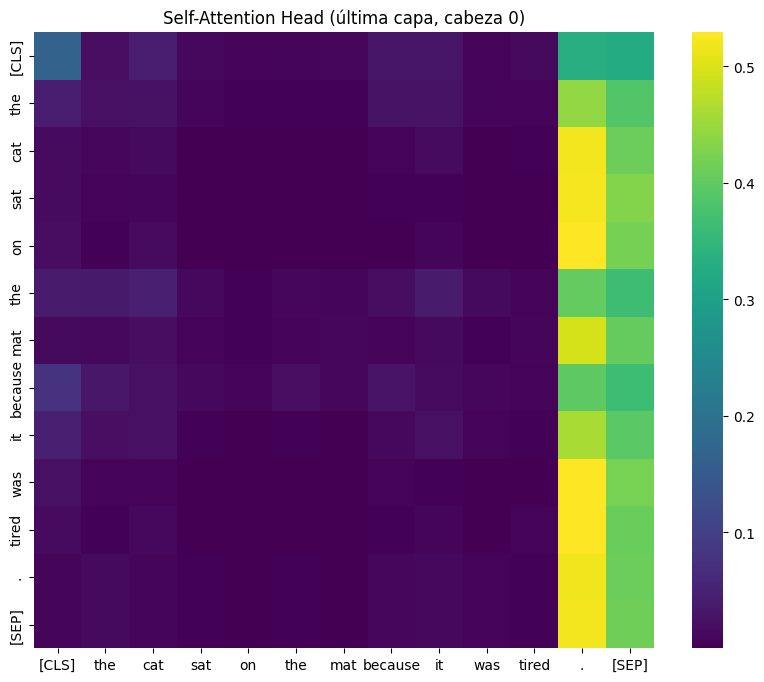

In [7]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar modelo y tokenizer
model_name = 'bert-base-uncased'
model = BertModel.from_pretrained(model_name, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Frase
sentence = "The cat sat on the mat because it was tired."
inputs = tokenizer(sentence, return_tensors='pt')

# Obtener outputs
with torch.no_grad():
    outputs = model(**inputs)

# Extraer atenciones
attention = outputs.attentions  # Lista de tensores [layer][batch][head][token][token]

# Elegir la última capa, primer batch, primera cabeza
attn_matrix = attention[-1][0][0]  # shape: (num_tokens, num_tokens)

# Convertir tokens
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Plot con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attn_matrix.numpy(), xticklabels=tokens, yticklabels=tokens, cmap="viridis")
plt.title("Self-Attention Head (última capa, cabeza 0)")
plt.show()


In [16]:
from transformers import BertTokenizer, BertModel
from bertviz import head_view
import torch

# Cargar modelo y tokenizer preentrenado
model_name = 'bert-base-uncased'
model = BertModel.from_pretrained(model_name, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Frase a analizar
sentence = "The cat sat on the mat because it was tired."

# Tokenización
inputs = tokenizer(sentence, return_tensors='pt')

# Obtener salidas con atención activada
with torch.no_grad():
    outputs = model(**inputs)

# Obtener las matrices de atención
attention = outputs.attentions

# Convertir tokens para visualización
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Mostrar atención de una capa y cabeza específicas
layer_num = 5   # puedes cambiar este número (0 a 11)
head_num = 3    # puedes cambiar este número (0 a 11)

# Visualización
head_view(attention, tokens, layer=layer_num, head=head_num)


ImportError: cannot import name 'display' from 'IPython.core.display' (e:\Diplomas, certificados o cursos\IA Convesacional\Actividades Prácticas\venv\Lib\site-packages\IPython\core\display.py)

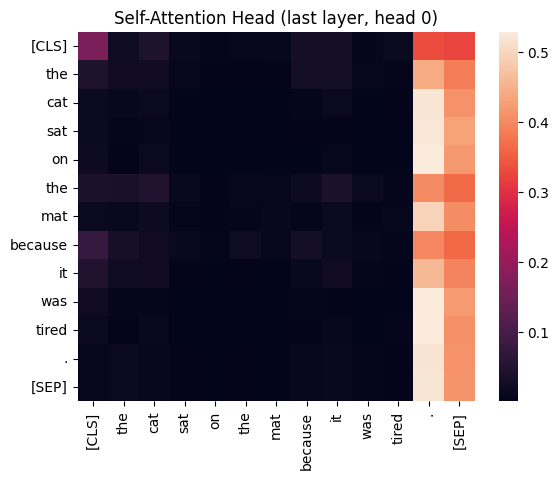

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar atención de una sola cabeza de la última capa
attn_matrix = attention[-1][0][0]  # última capa, batch 0, cabeza 0

sns.heatmap(attn_matrix.numpy(), xticklabels=tokens, yticklabels=tokens)
plt.title("Self-Attention Head (last layer, head 0)")
plt.show()
